# Задача мультиклассификации
### От бинарной классификации к мультиклассификации 

К этому моменту Вы, так или иначе, научились решать задачу классификации для случая, когда имеется два класса: отрицательный/положительный, черный/белый и т.п. Но часто встречаются ситуации, когда классов может быть несколько, например, три. Как применить наши знания о методах классификации? Как проверить качество полученных результатов классификации? Эти вопросы приводят нас к понятию **Мультиклассификации**. Оговоримся, что зачастую используется термин **Многоклассовая классификация**.

Итак, **мультиклассификация** это задача предсказания класса для объекта в случае, когда классов больше двух.

Вообще говоря, принято считать, что в задаче мультиклассфикации один объект принадлежит только одному классу, что не всегда верно. Подобные задачи называются задачами **множественной классификации**. Техника их решения имеет много общего с решениями задач мультиклассификации. 

### Постановка задачи

$X$ - множество описаний объектов (признаки)

$y$ - истинная метка класса для каждого объекта (обычно метка обозначается целыми числами:..0,1,2,3...)

Как и в задаче бинарной классификации, наша цель найти зависимость между $Х$ и $y$, а именно: по имеющимся данным (обучающая выборка)<br> найти соответствие между множеством объектов $X$ и множество классов $y$



### Пример

Обратимся к классическому примеру классификации - классификации цветков Ириса. Данные о цветках Ириса стали, в некотором роде, <br>
"джазовым стандартом" данных для задачи классификации. Впервые были использованы в 1936 году (**!**) Рональдом Фишером для демонстрации работы разработанного им метода дискриминантного анализа - прародителя многих методов машинного обучения.<br>

**Классификация цветков Ириса**

Требуется классифицировать цветки Ириса по трём (ср. с бинарной классификацией) видам:

* iris setosa
* iris versicolor
* iris virginica


В качестве признаков рассмотрим два параметра: длину и ширину лепестка (ср. с бинарной классификацией)

In [1]:
from classification_helper import * # Подгружаем функции
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
import numpy as np

In [2]:
X, kind_iris = get_data(["iris setosa","iris versicolor","iris virginica"])

$X$ - двумерный массив признаков

$kind\_iris$ - вектор истинных видов цветков (*target*)

In [3]:
print_data(X,kind_iris,columns = ["Длина лепестка", "Ширина лепестка"])

,Длина лепестка,Ширина лепестка,Вид Ириса
0,1.4,0.2,iris setosa
1,1.4,0.2,iris setosa
2,1.3,0.2,iris setosa
3,1.5,0.2,iris setosa
4,1.4,0.2,iris setosa
5,1.7,0.4,iris setosa
6,1.4,0.3,iris setosa
7,1.5,0.2,iris setosa
8,1.4,0.2,iris setosa
9,1.5,0.1,iris setosa


Как и в задаче бинарной классификации визуализируем данные:

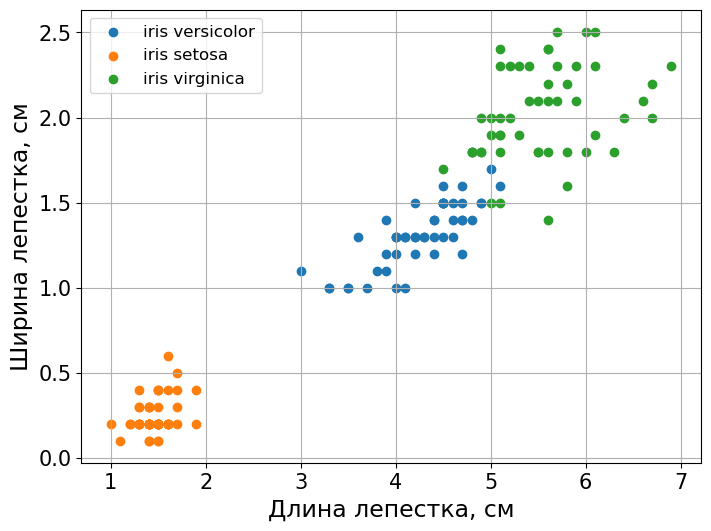

In [4]:
plot_data(X,kind_iris,columns = ["Длина лепестка", "Ширина лепестка"])

Три класса довольно сильно различаются, поэтому, кажется, задача мультиклассификации решается. Но как же именно решать задачу мультиклассификации?

Попробуем прийти к ответу:

1. в бинарной классификации строится, в общем случае, разделяющая два класса поверхность $S(\theta)$ (в случае логистической регрессии - гиперплоскость). Параметры поверхности $\theta$ подбираются исходя из решения какой-либо задачи оптимизации функции ошибок $L(\theta,X,y)$:
\begin{equation*}
S(\theta): L(\theta,X,y) \xrightarrow {\theta} min
\end{equation*}

2. особенность функции ошибок $L(\theta,X,y)$ в том, что она, строго говоря, не всегда подбирается таким образом, чтобы из ее минимизации явно следовало решение задачи классификации. Например, в логистической регрессии оптимизируется кросс-энтропия, при этом, как известно, кросс-энтропия позволяет находить оптимальные вероятности принадлежности объекта классам, но не сами метки класса. После, в зависимости от конечной цели (максимизация метрик качества), полученную гиперплоскость можно сдвигать параллельным переносом. То есть решение задачи оптимизации кросс-энтропии **это еще не конечный шаг поиска оптимальной гиперплоскости в задаче бинарной классификации**.

3. Глядя на график сверху, мы можем мысленно отделить каждый класс от двух других своей собственной гиперплоскостью. Мы умеем это делать с помощью всё той же бинарной классификации.

Все это может навести на следующие соображения:

* Для решения задачи мультиклассификации необходимо строить разделяющую поверхность (пусть и довольно причудливую);
* Разделяющую поверхность можно строить в несколько этапов;
* Для мультиклассификации нам могут понадобиться несколько бинарных классификаторов!

### Решение задачи мультиклассификации.

#### One vs Rest (Один против остальных)

Мы приходим к очевидному, но весьма распространенному методу мультиклассификации **One vs Rest**. Смысл его весьма прост: строятся $K$ классификаторов, каждый из которых отделяет назначенный ему класс от всех остальных. Окончательное решение принадлежности классу сводится к поиску класса с максимальным значением (вероятности) классификатора.

#### Классификация ирисов

Реализуем простой метод **One vs Rest** с использованием ранее классификатров линейной регрессии из sklearn

In [5]:
class multiclassification_One_vs_all:
    def __init__(self,classmodel = LogisticRegression):
        self.classmodel = classmodel
        self.models = {}        
        
    def fit(self,X,y):
        dict_iris = {0:"iris setosa",1:"iris versicolor",2:"iris virginica"}        
        labels = set(y)
        models = []
        for label in labels:
            print(f"Обучение модели, отделяющей {dict_iris[label]} от остальных")
            model = self.classmodel(C = 100,solver = "lbfgs")
            y_label = y == label
            model.fit(X,y_label)
            self.models[label] = model
            print("Готово!")
    
    def predict(self,X):        
        labels = np.sort(list(self.models.keys()))
        predictions = np.zeros((len(X),3))
        for label in labels:
            model = self.models[label]
            predictions[:,label] = model.predict_proba(X)[:,1]
        return np.argmax(predictions,axis=1)

In [6]:
dict_iris = {"iris setosa":0,"iris versicolor":1,"iris virginica":2}
Y = np.array([dict_iris[iris] for iris in kind_iris])
columns = ["Длина лепестка", "Ширина лепестка"]
dict_param = {"Длина чашелистника":0, "Ширина чашелистника":1,"Длина лепестка":2,"Ширина лепестка":3}
N = [dict_param[par] for par in columns]
model_One_vs_all = multiclassification_One_vs_all()
model_One_vs_all.fit(X[:,[N[0],N[1]]],Y)

Обучение модели, отделяющей iris setosa от остальных
Готово!
Обучение модели, отделяющей iris versicolor от остальных
Готово!
Обучение модели, отделяющей iris virginica от остальных
Готово!


Отобразим полученную разделяющую поверхность:

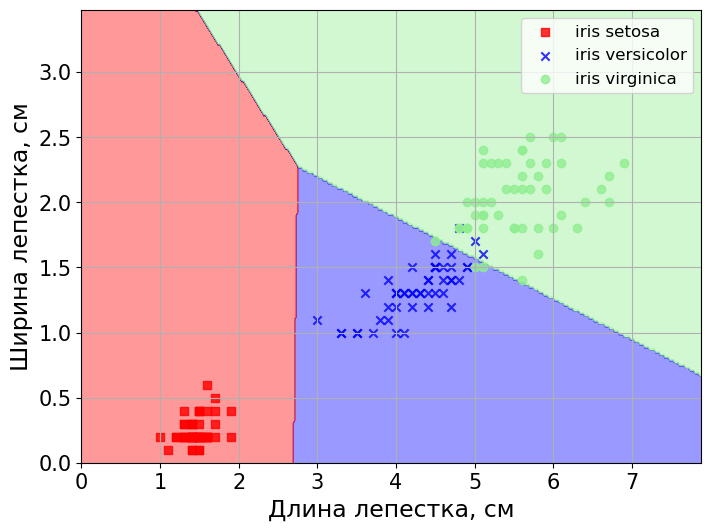

In [7]:
plot_decision_regions(X, Y, classifier=model_One_vs_all , test_idx=None, resolution=0.02,columns = columns)

Как и ожидалось, разделяющая поверхность оказалась совокупностью линейных разделяющих поверхностей.

#### One vs One (Один против одного)

Еще один популярный метод мультиклассификации - это метод **One vs One** (Один против одного).
Суть его в слеудующем: выделяются все пары классов, и на каждой паре обучается свой собственный классификатор.
Класс для конкретного объекта определяется голосованием.

#### Классификация ирисов

Реализуем простой метод **One vs One** с использованием встроенных в sklearn классификатров логистической регрессии

In [8]:
class multiclassification_One_vs_one:
    def __init__(self,classmodel = LogisticRegression):
        self.classmodel = classmodel
        self.models = {}        
        
    def fit(self,X,y):
        dict_iris = {0:"iris setosa",1:"iris versicolor",2:"iris virginica"}        
        labels = set(y)
        labels_dual = []
        for label_1 in labels:
            for label_2 in labels:
                if label_1 != label_2:
                    labels_dual.append(tuple(np.sort([label_1,label_2])))
        
        labels_dual = set(labels_dual)        
        models = []
        for label_d in labels_dual:
            print(f"Обучение модели, отделяющей {dict_iris[label_d[0]]} от {dict_iris[label_d[1]]}")
            model = self.classmodel(C = 10, solver = "lbfgs")
            X_ = X[(y == label_d[0]) | (y == label_d[1])]
            y_ = y[(y == label_d[0]) | (y == label_d[1])]
            y_label = y_ == label_d[1]
            model.fit(X_,y_label)
            self.models[label_d] = model
            print("Готово!")
    
    def predict(self,X):        
        labels = self.models.keys()
        predictions = np.zeros((len(X),3))        
        for label in labels:
            model = self.models[label]
            predictions[:,label[0]] = predictions[:,label[0]] + np.invert(model.predict(X))
            predictions[:,label[1]] = predictions[:,label[1]] + model.predict(X)
        return np.argmax(predictions,axis=1)

In [9]:
dict_iris = {"iris setosa":0,"iris versicolor":1,"iris virginica":2}
Y = np.array([dict_iris[iris] for iris in kind_iris])
columns = ["Длина лепестка", "Ширина лепестка"]
dict_param = {"Длина чашелистника":0, "Ширина чашелистника":1,"Длина лепестка":2,"Ширина лепестка":3}
N = [dict_param[par] for par in columns]
model_One_vs_one = multiclassification_One_vs_one()
model_One_vs_one.fit(X[:,[N[0],N[1]]],Y)

Обучение модели, отделяющей iris setosa от iris versicolor
Готово!
Обучение модели, отделяющей iris setosa от iris virginica
Готово!
Обучение модели, отделяющей iris versicolor от iris virginica
Готово!


Отобразим полученную разделяющую поверхность:

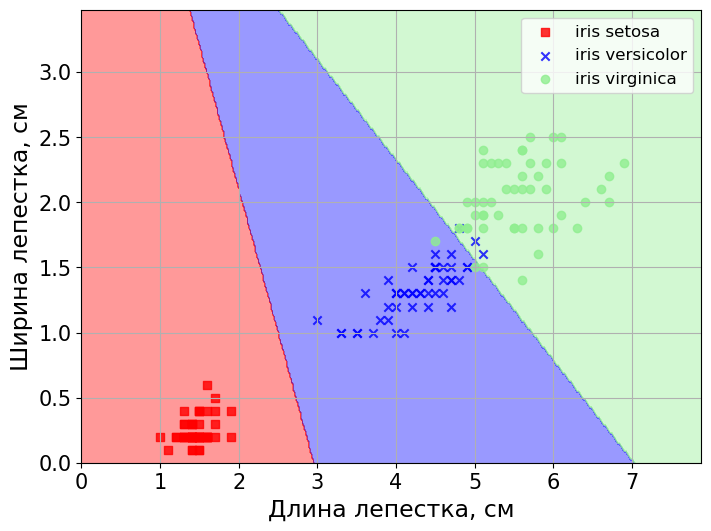

In [10]:
plot_decision_regions(X, Y, classifier=model_One_vs_one , test_idx=None, resolution=0.02,columns = columns)

Как и в предыдущем случае, разделяющая поверхность оказалась совокупностью линейных разделяющих поверхностей.

### Недостатки методов
#### Недостатки One vs Rest

Основным недостатком **One vs Rest** является равный учет выходных значений (вероятностей) всех моделей, и для выбора соответствующего класса объекта необходимо просто найти максимальную вероятность по всем классификаторам. Однако в действительности может случиться, что предсказанная вероятность $P$ классификаторами $A$ и $B$ означает разную степень уверенности в своем предсказании. Поэтому часто приходится как-то совместно калибровать значения предсказанных вероятностей разных кассификаторов, например, с помощью весовых коэффициентов и т.п. Так или иначе, совместная калибровка это дополнительная и не простая задача.

#### Недостатки One vs One

Метод **One vs One** позволяет калибровать каждый классфикатор отдельно, что немного исправляет недостатки метода **One vs Rest**. Однако у **One vs One** есть свои собственные, довольно существенные, недостатки. Одним из главных недостатков является значительное требование к ресурсам в случае большого количества классов. Действительно, если классов $K$, то **One vs Rest** требует обучения N классификаторов, тогда как **One vs One** требует по крайней мере $K(K-1)/2$ классифакторов. Если для задачи с тремя классами разницы никакой нет, то для, например, $K=10$ количество классификаторов равно, соответсвенно $10$ и $45$. Хотя надо заметить, классификаторы в **One vs One** строятся по *меньшим* объемам выборок, так что скорость обучения может компенсировать количество классификаторов, в свою очередь, сами классификаторы являются менее "мощными". Здесь **One vs One** проявляет довольно распространенную в машинном обучении ситуацию: окончательная модель строится с использованием довольно большого числа не очень мощных классификаторов.

Еще одним недостатком **One vs One** является наличие коллизий, то есть когда за два класса проголосовало одикавое число классификаторов. Для небольшого числа классов это может быть серьезным препятствием. Можно ради любопытства изменить параметр $C=10$ на $C=100$ в реализованном выше классе multiclassification_One_vs_one в методе fit и снова построить разделяющую поверхность. Появятся артефакты - это и есть коллизии

### Softmax.

Как уже многократно отмечалось, модель бинарной классификации часто возвращает вероятность принадлежности классу $1$. Однако в рассмотренных моделях мультиклассификации вероятность принадлежности к классам в явном виде не фигурирует: в **One vs Rest** каждому классу соотвествует оценка из соотвествующего бинарного классификатора, что не может являться вероятностью принадлежности, так как набор оценок не нормированный; в **One vs One** каждому классу соответсвует количество голосов в пользу этого класса, что также не может быть интерпретировано как вероятность. Очевидная идея - это применить преобразование к набору соответсвующих классам чисел, такое, чтобы полученный набор чисел можно было рассматривать как вероятности, то есть были бы неотрицательными в сумме давали бы единицу. Озвученным требованиям соответсвует функция, называемая *softmax*, выглядящая следующим образом:
\begin{equation*}
softmax(x)_i = \dfrac{e^{x_i}}{\sum_{j=1}^{N}e^{x_j}}
\end{equation*}

Набор чисел $softmax(x)_i$ уже можно интерпретировать как вероятность принадлежности классу $i$.

### Softmax как расширение логистической регрессии до задачи мультиклассификации.

Функция *softmax* интерпретируется как вероятность принадлежности к классу для многоклассовых задач, отсюда возникает вопрос: можно ли использовать ее точно так же, как сигмоиду в логистической регрессии? Ответ: конечно можно. Вычисление вероятности в логистической регрессии происходит в соответсвуюем порядке:
1. вычисление скалярного произведения вектора весов и вектора признаков $z_i=w^Tx_i$;
2. вычисление вероятности принадлежнсти $p(X_i \in {1})=\sigma(z_i)$.

Применим эту схему ко многоклассовой задаче, сделав несколько модификаций:
1. вычисление скалярного произведения вектора весов класса $k$ и вектора признаков $z_i^k=w_k^Tx_i$;
2. вычисление вероятности принадлежнсти $p(X_i \in {k})=softmax(z_i)_k$

Почти ничего не изменилось. Добавились только несколько дополнительных векторов весов. Если объединить все веса в матрицу, то первый шаг можно заменить на матричное произведение $z_i(W) = Wx_i$. Матрица весов $W$ имеет размерность $K*M$, где $M$ - это количество признаков (или размерность вектора $x_i$).

Теперь остается вопрос, как обучить такую модель? Ответ также находится в логистической регрессии: минимизация кросс-энтропии. Для мультиклассификации кросс-энтропия играет ту же вероятностную роль, что и для бинарной классификации. Тогда можно немедленно записать:

\begin{equation*}
crossentropy(W,X,y) = -\dfrac{1}{N}\sum_{k=1}^{K}{\sum_{i: y_i \in k}ln(softmax(z_i(W))_k)}
\end{equation*}

Внешняя сумма это суммирование по всем классам, внутренняя сумма производит суммирование только по тем примерам X, которые принадлежат классу $k$.

Чтобы избежать двойного суммирования, используем следующий прием, который далее будет называться *one hot encoding*: вместа метки $k$-того класса $y_i=k$ введем вектор $Y_i$, состоящий из нулей и единицы, стоящей на $k$-том месте.
Так, теперь можем записать:
\begin{equation*}
L(W) = crossentropy(W,X,Y) = -\dfrac{1}{N}\sum_{i=1}^{N}Y_i^Tln(softmax(z_i(W)))
\end{equation*}

Здесь $ln(softmax(z_i))$ - это вектор логарифмов каждого компонента вектора $softmax(z_i)$. Для использования градиентого спуска необходимо знать производные по всем параметрам $W$ от кросс-энтропии. Эта задача вполне решается:

\begin{equation*}
\dfrac{\partial L(W)}{\partial w_{kj}} = -\dfrac{1}{N}\sum_{i=1}^{N}Y_i^T \dfrac{\partial ln(softmax(z_i(W)))}{\partial w_{kj}}
\end{equation*}

$s$-тый компонент вектора $ln(softmax(z_i(W)))$ может быть выражен как:

\begin{equation*}
ln(softmax(z_i(W))_s) = W_sx_i - ln(\sum_{k=1}^{K}e^{W_kx_i})
\end{equation*}
$W_s$ - $s$-тая строка матрицы $W$.

Тогда производная каждого $s$-того компонента вектора $W_sx_i - ln(\sum_{k=1}^{K}e^{W_kx_i})$ по $w_{kj}$ может быть выражена как:
\begin{equation*}
\dfrac{\partial (W_sx_i - ln(\sum_{k=1}^{K}e^{W_kx_i}))}{\partial w_{kj}} = \begin{cases}
x_{i,j} - \dfrac{x_{i,j}e^{W_kx_i}}{\sum_{k=1}^{K}e^{W_kx_i}}, s = k, \\
- \dfrac{x_{i,j}e^{W_kx_i}}{\sum_{k=1}^{K}e^{W_kx_i}}, s \neq k
\end{cases}
= \begin{cases}
x_{i,j} - x_{i,j}softmax(Wx_i)_k, s = k, \\
- x_{i,j}softmax(Wx_i)_k, s \neq k
\end{cases}
\end{equation*}

Введем единичный вектор $e_k$ - вектор из нулей, кроме $k$-того элемента, который равен единице. Тогда производная вектора $Wx_i - ln(\sum_{k=1}^{K}e^{W_kx_i})$ по $w_{kj}$  может быть выражена как:
\begin{equation*}
\dfrac{\partial Wx_i - ln(\sum_{k=1}^{K}e^{W_kx_i})}{\partial w_{kj}} = x_{ij}(e_k - softmax(Wx_i)_k)
\end{equation*}


Тогда производная функции $L(W)$ может быть записана:
\begin{equation*}
\dfrac{\partial L(W)}{\partial w_{kj}} = -\dfrac{1}{N}\sum_{i=1}^{N}Y_i^Tx_{ij}(e_k - softmax(Wx_i)_k)
\end{equation*}


Раз получена формула для производной по каждому весу, то можно немедленно воспользоваться уже знакомым градиентным спуском для обучения многоклассовой логистической регрессии.


In [11]:
# Вспомогательные функции

# реализуем softmax:
def Loss(X,W,Y):      
    return -np.mean(np.sum(Y * np.log(softmax(X,W).T),axis = 1))

# реализуем softmax:
def softmax(X,W):
    return np.exp(W @ X.T) / np.sum(np.exp(W @ X.T),axis = 0)

# реализуем one hot encoding:
def one_hot_encoding(Y):
    Y_ = np.zeros((len(Y),3))
    Y_[Y == 0,0] = 1
    Y_[Y == 1,1] = 1
    Y_[Y == 2,2] = 1
    return Y_

# реализуем вычисление градиента:
def gradient_function(W, X, Y):
    grad = np.zeros_like(W)
    soft = softmax(X,W)
    for k in range(W.shape[0]):
        ek = np.zeros((W.shape[0],1))
        ek[k] = 1
        ek_softmax = ek - soft[k,:]
        for j in range(W.shape[1]):
            sum_ = np.sum(Y * ek_softmax.T,axis = 1)
            grad[k,j] = -np.mean(X[:, j] * sum_)
    return grad

# Добавление единичного столбца
def create_data(X):
    X_ones = np.ones(X.shape[0])
    return np.column_stack([X_ones, X])

# Градиентный спуск
def gradient_descent(W, X, y, alpha, iters):        
    w = W
    for i in range(iters):
        w = w - alpha * gradient_function(w, X, y)
        if i % 400 == 0:
            print("Loss функция:",Loss(X,w,y))        
    return w

Классификация осуществляется так же как и обычно - поиском класса, соответствующего максимальной вероятности в векторе softmax.

#### Классификация ирисов
Реализуем простой метод softmax:

In [12]:
class multiclassification_softmax:
    def __init__(self):
        self.W = None
        
    def fit(self,X,y):
        W = np.random.randn(3,3)*0.1
        self.W = gradient_descent(W, X, y, alpha=0.1, iters=4000)
        print("Готово!")
    
    def predict(self,X):        
        predictions = softmax(X,self.W)
        return np.argmax(predictions,axis=0)

In [13]:
dict_iris = {"iris setosa":0,"iris versicolor":1,"iris virginica":2}
Y = np.array([dict_iris[iris] for iris in kind_iris])
Y_ = one_hot_encoding(Y)
columns = ["Длина лепестка", "Ширина лепестка"]
dict_param = {"Длина чашелистника":0, "Ширина чашелистника":1,"Длина лепестка":2,"Ширина лепестка":3}
N = [dict_param[par] for par in columns]
model_softmax = multiclassification_softmax()
X_ = create_data(X)
X_train = X_[:,[0,N[0]+1,N[1]+1]]
model_softmax.fit(X_train,Y_)

Loss функция: 1.0426377613788178
Loss функция: 0.42013381852774245
Loss функция: 0.32993796364058214
Loss функция: 0.2840396882320562
Loss функция: 0.2541406925480202
Loss функция: 0.2325170746663137
Loss функция: 0.21593296590943922
Loss функция: 0.202715286084157
Loss функция: 0.1918849441956655
Loss функция: 0.18282074830158626
Готово!


Отобразим полученную разделяющую поверхность:

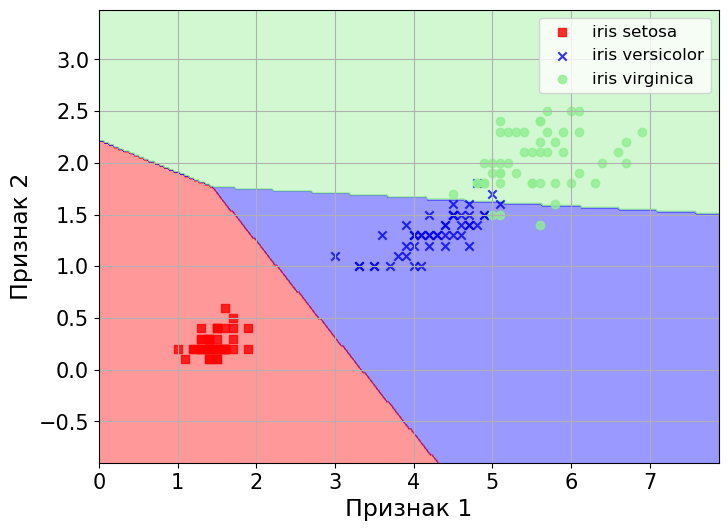

In [14]:
plot_decision_regions_softmax(X, Y, classifier=model_softmax , test_idx=None, resolution=0.02,columns = columns)

Softmax также довольно неплохо справился с разделением классов.

Модель softmax по своему построению сглаживает недостаток One vs All в том смысле, что все набор весов подбираются зависимо и с большей уверенностью отвечают требованию равномерности оценок.


Необходимо отметить, что softmax играет важнейшую роль в более сложных моделях мультиклассификации (например, в нейронных сетях)

### Метрики качества в задаче мультиклассификации

Метрики качества задачи мультиклассификации мало чем отличаются от бинарной классификации. 
Метрика *accuracy* считает долю верных ответов.

Для наших моделей:

In [15]:
y_pred_One_vs_all = model_One_vs_all.predict(X[:,[N[0],N[1]]])
y_pred_One_vs_one = model_One_vs_one.predict(X[:,[N[0],N[1]]])
y_pred_softmax = model_softmax.predict(X_train)

In [16]:
print("Метрика Accuracy для модели One vs All на тренировочных данных:",np.mean(Y == y_pred_One_vs_all))
print("Метрика Accuracy для модели One vs One на тренировочных данных:",np.mean(Y == y_pred_One_vs_one))
print("Метрика Accuracy для модели softmax на тренировочных данных:",np.mean(Y == y_pred_softmax))

Метрика Accuracy для модели One vs All на тренировочных данных: 0.96
Метрика Accuracy для модели One vs One на тренировочных данных: 0.9666666666666667
Метрика Accuracy для модели softmax на тренировочных данных: 0.9666666666666667


precision, recall и f1-score также считаюся в мультиклассификации. Традиоционно они считаются в двух направлениях:
1. macro-метрики;
2. micro-метрики.

macro-метрики рассчитываются по каждому классу отдельно и усредняются

In [102]:
def precision_score_macro(y_pred,y_true):
    P = 0
    for y in set(y_true):
        P = P + precision_score(y_true=y_true==y,y_pred=y_pred==y)
    return P/3

def recall_score_macro(y_pred,y_true):
    P = 0
    for y in set(y_true):
        P = P + recall_score(y_true=y_true==y,y_pred=y_pred==y)
    return P/3


def f1_score_macro(y_pred,y_true):
    P = 0
    for y in set(y_true):
        P = P + f1_score(y_true=y_true==y,y_pred=y_pred==y)
    return P/3

In [103]:
print("Метрика precision-macro для модели One vs All на тренировочных данных:",precision_score_macro(y_pred_One_vs_all,Y))
print("Метрика precision-macro для модели One vs One на тренировочных данных:",precision_score_macro(y_pred_One_vs_one,Y))
print("Метрика precision-macro для модели softmax на тренировочных данных:",precision_score_macro(y_pred_softmax,Y))
print()
print("Метрика recall-macro для модели One vs All на тренировочных данных:",recall_score_macro(y_pred_One_vs_all,Y))
print("Метрика recall-macro для модели One vs One на тренировочных данных:",recall_score_macro(y_pred_One_vs_one,Y))
print("Метрика recall-macro для модели softmax на тренировочных данных:",recall_score_macro(y_pred_softmax,Y))
print()
print("Метрика f1_score-macro для модели One vs All на тренировочных данных:",f1_score_macro(y_pred_One_vs_all,Y))
print("Метрика f1_score-macro для модели One vs One на тренировочных данных:",f1_score_macro(y_pred_One_vs_one,Y))
print("Метрика f1_score-macro для модели softmax на тренировочных данных:",f1_score_macro(y_pred_softmax,Y))


Метрика precision-macro для модели One vs All на тренировочных данных: 0.96
Метрика precision-macro для модели One vs One на тренировочных данных: 0.9667867146858743
Метрика precision-macro для модели softmax на тренировочных данных: 0.9667867146858743

Метрика recall-macro для модели One vs All на тренировочных данных: 0.96
Метрика recall-macro для модели One vs One на тренировочных данных: 0.9666666666666667
Метрика recall-macro для модели softmax на тренировочных данных: 0.9666666666666667

Метрика f1_score-macro для модели One vs All на тренировочных данных: 0.96
Метрика f1_score-macro для модели One vs One на тренировочных данных: 0.9666633329999667
Метрика f1_score-macro для модели softmax на тренировочных данных: 0.9666633329999667


micro-метрики рассчитываются по всем ответам в соответствии с формулами precision, recall или f1-score:
1. Precision = TP/(TP + FP)
2. Recall = TP/(TP + FN)
3. f1-score = 2 * Precision * Recall / (Precision+Recall)

In [108]:
def precision_score_micro(y_pred,y_true):
    TP = 0
    FP = 0
    for y in set(y_true):
        TP = TP + (y_pred[y_true==y] == y).sum()
        FP = FP + (y_pred[y_true != y] == y).sum()    
    return TP/(FP+TP)

def recall_score_micro(y_pred,y_true):
    TP = 0
    FN = 0
    for y in set(y_true):
        TP = TP + (y_pred[y_true==y] == y).sum()
        FN = FN + (y_pred[y_true == y] != y).sum()    
    return TP/(FN+TP)


def f1_score_micro(y_pred,y_true):
    pr = precision_score_micro(y_pred,y_true)
    re = recall_score_micro(y_pred,y_true)
    return 2*pr*re/(pr + re)

In [109]:
print("Метрика precision-micro для модели One vs All на тренировочных данных:",precision_score_micro(y_pred_One_vs_all,Y))
print("Метрика precision-micro для модели One vs One на тренировочных данных:",precision_score_micro(y_pred_One_vs_one,Y))
print("Метрика precision-micro для модели softmax на тренировочных данных:",precision_score_micro(y_pred_softmax,Y))
print()
print("Метрика recall-micro для модели One vs All на тренировочных данных:",recall_score_micro(y_pred_One_vs_all,Y))
print("Метрика recall-micro для модели One vs One на тренировочных данных:",recall_score_micro(y_pred_One_vs_one,Y))
print("Метрика recall-micro для модели softmax на тренировочных данных:",recall_score_micro(y_pred_softmax,Y))
print()
print("Метрика f1_score-micro для модели One vs All на тренировочных данных:",f1_score_micro(y_pred_One_vs_all,Y))
print("Метрика f1_score-micro для модели One vs One на тренировочных данных:",f1_score_micro(y_pred_One_vs_one,Y))
print("Метрика f1_score-micro для модели softmax на тренировочных данных:",f1_score_micro(y_pred_softmax,Y))

Метрика precision-micro для модели One vs All на тренировочных данных: 0.96
Метрика precision-micro для модели One vs One на тренировочных данных: 0.9666666666666667
Метрика precision-micro для модели softmax на тренировочных данных: 0.9666666666666667

Метрика recall-micro для модели One vs All на тренировочных данных: 0.96
Метрика recall-micro для модели One vs One на тренировочных данных: 0.9666666666666667
Метрика recall-micro для модели softmax на тренировочных данных: 0.9666666666666667

Метрика f1_score-micro для модели One vs All на тренировочных данных: 0.96
Метрика f1_score-micro для модели One vs One на тренировочных данных: 0.9666666666666667
Метрика f1_score-micro для модели softmax на тренировочных данных: 0.9666666666666667


macro-метрики более чувствительны к серьезным ошибкам в маленьких классах, в точности как метрика f1-score чувствительна для малого положительного класса в бинарной классификации.